# **Milestone 2: Advanced Data Analysis and Feature Engineering**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_train = pd.read_csv("cleaned_data.csv")
df_scaled = pd.read_csv("scaled_data.csv")

**EDA:**

In [37]:
# How many total customers are there?
print(f"Total number of customers: {df_train["Exited"].count()}")

Total number of customers: 158400


In [38]:
# What is the overall churn rate? (percentage of customers who exited)
print(f"Churn rate: {df_train["Exited"].mean() * 100:.2f}%")

Churn rate: 20.46%


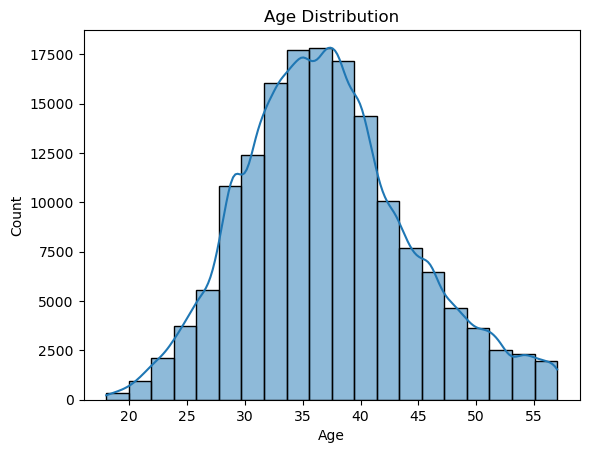

In [39]:
# What is the age distribution of customers? Is there a relationship between age and churn?
sns.histplot(df_train["Age"], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

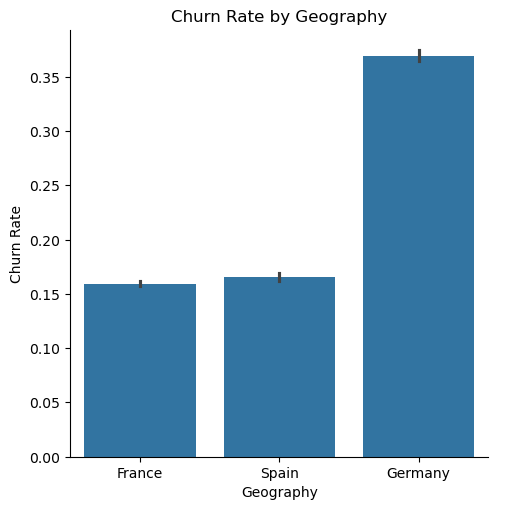

In [40]:
# Which countries have the highest churn rates? (Geography vs. Exited)
sns.catplot(x="Geography", y="Exited", data=df_train, kind="bar")
plt.xlabel("Geography")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Geography")
plt.show()

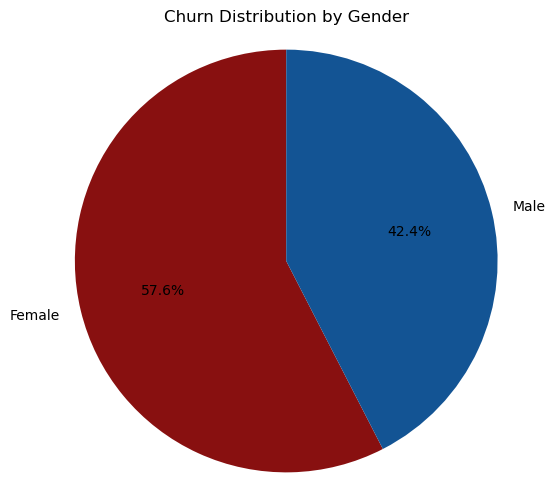

In [41]:
# Is there a difference in churn between males and females?
churn_by_gender = df_train[df_train["Exited"] == 1]["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    churn_by_gender,
    labels=churn_by_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#881010", "#135494"]
)
plt.title("Churn Distribution by Gender")
plt.axis("equal")
plt.show()

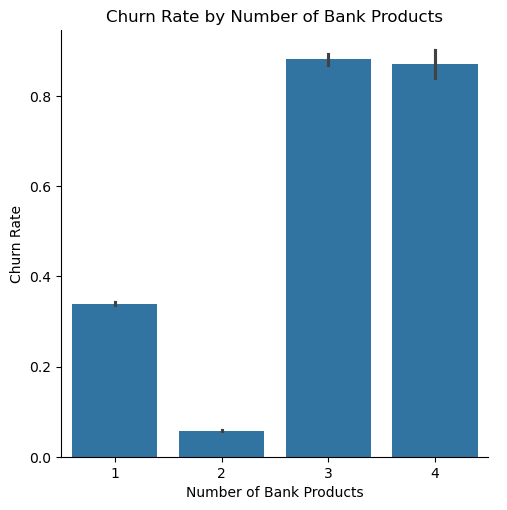

In [42]:
# Does the number of bank products affect churn?
sns.catplot(x="NumOfProducts", y="Exited", data=df_train, kind="bar")
plt.xlabel("Number of Bank Products")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Number of Bank Products")
plt.show()

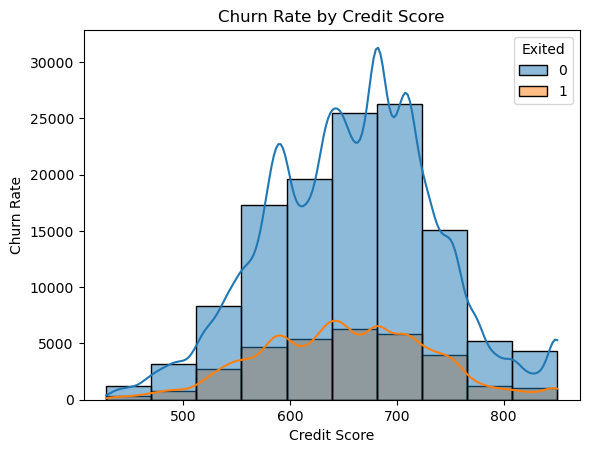

In [43]:
# Does a lower credit score increase the likelihood of churn?
sns.histplot(x =df_train["CreditScore"], bins=10, kde=True, hue=df_train["Exited"])
plt.xlabel("Credit Score")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Credit Score")
plt.show()

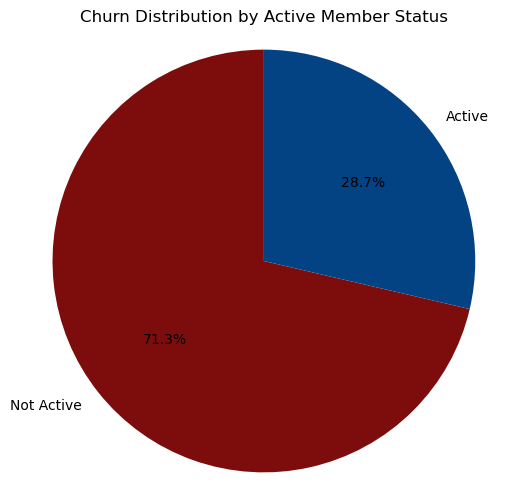

In [44]:
# Are inactive members more likely to churn?
churn_by_activity = df_train[df_train["Exited"] == 1]["IsActiveMember"].value_counts()
labels = ["Not Active", "Active"]

plt.figure(figsize=(6, 6))
plt.pie(churn_by_activity, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#7d0c0c", "#034383"])
plt.title("Churn Distribution by Active Member Status")
plt.axis("equal")
plt.show()

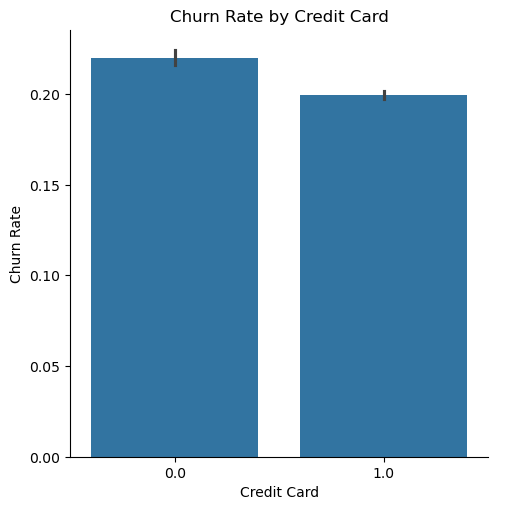

In [45]:
# Is owning a credit card related to churn?
sns.catplot(x="HasCrCard", y="Exited", data=df_train, kind="bar")
plt.xlabel("Credit Card")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Credit Card")
plt.show()

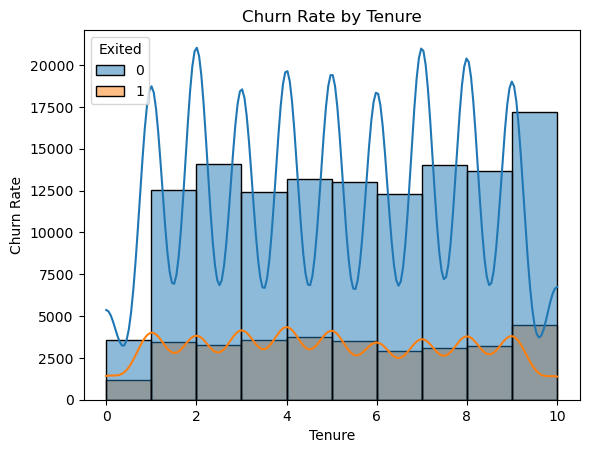

In [46]:
# Are older customers or those with shorter tenure more likely to leave?
sns.histplot(x =df_train["Tenure"], bins=10, kde=True, hue=df_train["Exited"])
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tenure")
plt.show()

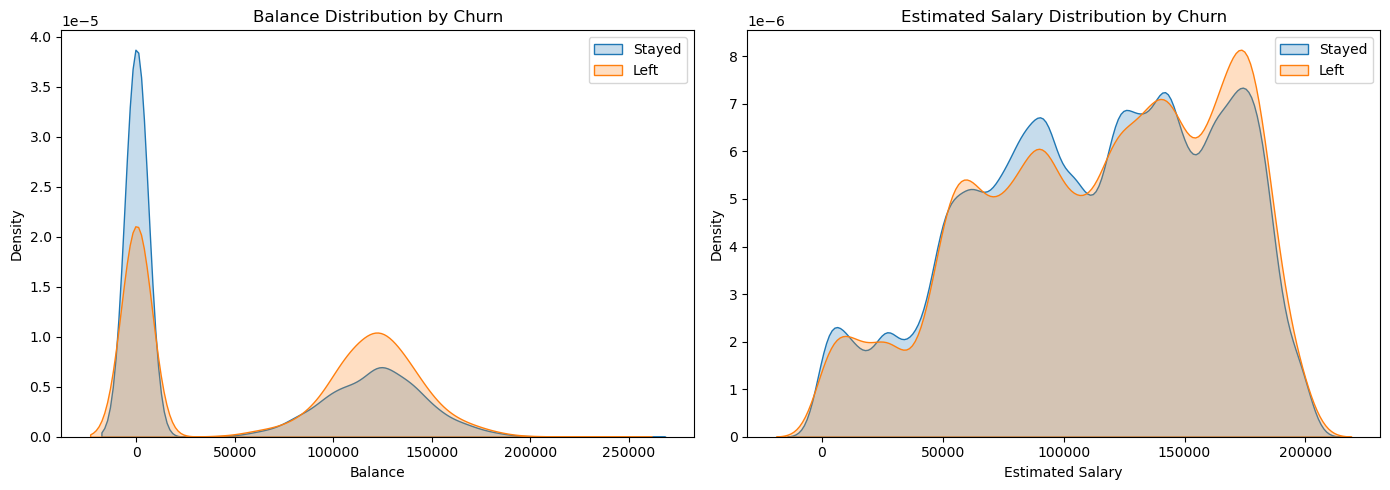

In [47]:
# Does account balance or estimated salary have a relationship with churn?
fig, axes = plt.subplots(1, 2, figsize=(14, 5))


sns.kdeplot(data=df_train[df_train["Exited"] == 0]["Balance"], label="Stayed", fill=True,ax=axes[0])
sns.kdeplot(data=df_train[df_train["Exited"] == 1]["Balance"], label="Left", fill=True,ax=axes[0])
axes[0].set_title("Balance Distribution by Churn")
axes[0].set_xlabel("Balance")
axes[0].legend()

sns.kdeplot(data=df_train[df_train["Exited"] == 0]["EstimatedSalary"], label="Stayed", fill=True,ax=axes[1])
sns.kdeplot(data=df_train[df_train["Exited"] == 1]["EstimatedSalary"], label="Left", fill=True,ax=axes[1])
axes[1].set_title("Estimated Salary Distribution by Churn")
axes[1].set_xlabel("Estimated Salary")
axes[1].legend()

plt.tight_layout()
plt.show()

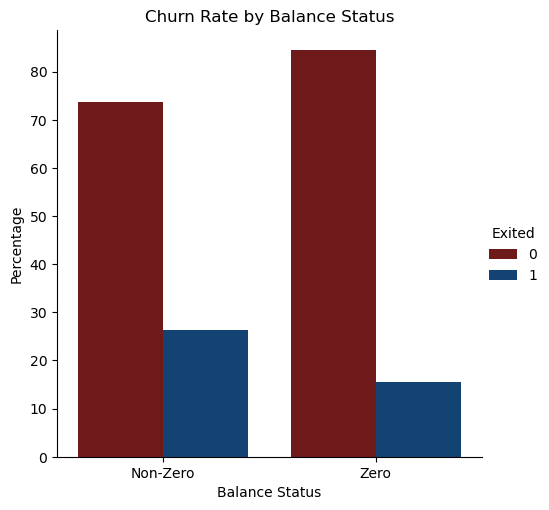

In [48]:
# Do customers with a zero balance tend to leave more?
df = df_train.copy()
df["ZeroBalance"] = df_train["Balance"].apply(lambda x: "Zero" if x == 0 else "Non-Zero")

plot_data = (
    df.groupby("ZeroBalance")["Exited"]
    .value_counts(normalize=True)
    .rename("ChurnRate")
    .reset_index()
)

plot_data["ChurnRate"] *= 100

sns.catplot(
    data=plot_data,
    kind="bar",
    x="ZeroBalance",
    y="ChurnRate",
    hue="Exited",
    palette= ["#7d0c0c", "#034383"]
)

plt.title("Churn Rate by Balance Status")
plt.xlabel("Balance Status")
plt.ylabel("Percentage")
plt.show()

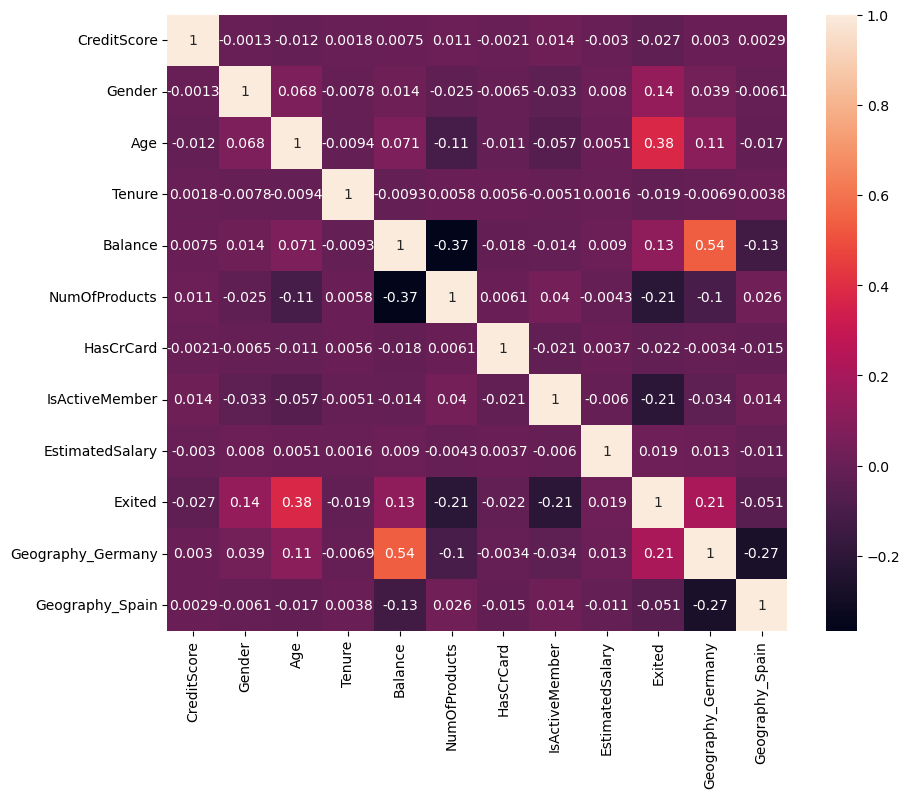

In [49]:
# Correlation Heatmap
corr = df_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()